In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels as st

In [2]:
dd=pd.read_csv(r'F:\VIRU\New folder\Norway.csv')

In [3]:
dd.head()

,months,sales
0,2012-01,2
1,2012-02,0
2,2012-03,4
3,2012-04,4
4,2012-05,3


In [4]:
dd.tail()

,months,sales
103,2020-08,348
104,2020-09,1239
105,2020-10,95
106,2020-11,326
107,2020-12,4423


In [5]:
dd['months']=pd.to_datetime(dd['months'])

In [6]:
dd.set_index('months',inplace=True)

<AxesSubplot:xlabel='months'>

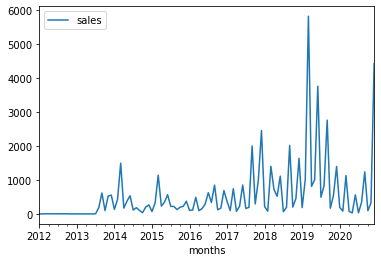

In [7]:
dd.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
dfuler = adfuller(dd['sales'])

In [10]:
dfuler
#p value <0.05 indicates stationary
#p value >0.05 indicates non stationary

(-2.266682245310902,
 0.18293881356829295,
 3,
 104,
 {'1%': -3.4948504603223145,
  '5%': -2.889758398668639,
  '10%': -2.5818220155325444},
 1499.3305552299094)

In [11]:
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

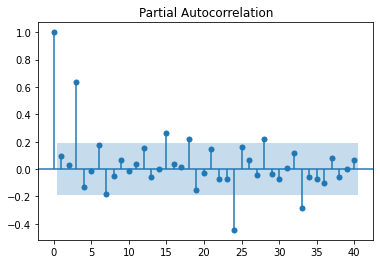

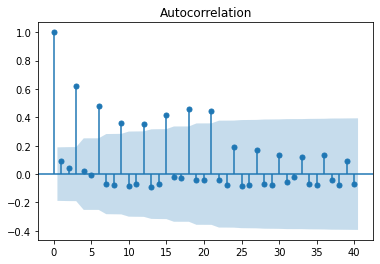

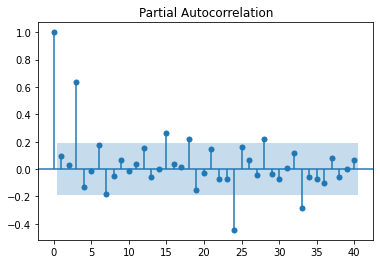

In [13]:
plot_acf(dd['sales'],lags=40)
plot_pacf(dd['sales'],lags=40)

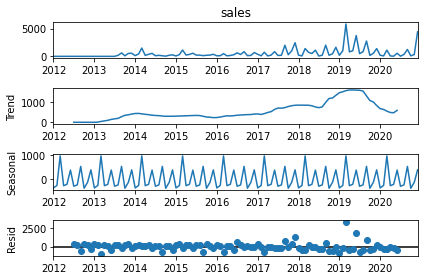

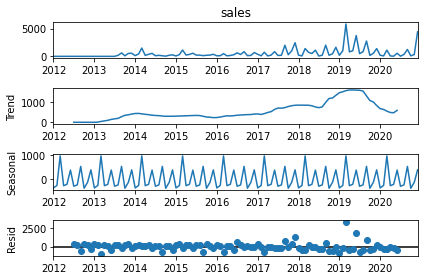

In [14]:
import statsmodels
decompose= statsmodels.tsa.seasonal.seasonal_decompose(dd['sales'])
decompose.plot()

In [15]:
import statsmodels.api as sm

In [63]:
models = sm.tsa.statespace.SARIMAX(dd['sales'],order=(6,0,0),seasonal_order=(1,0,0,12))
results=models.fit()

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [64]:
dd['forecast']=results.predict(start=97,end=107,dynamic=True)

<AxesSubplot:xlabel='months'>

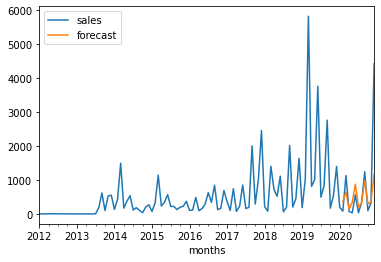

In [65]:
dd[['sales','forecast']].plot()

In [66]:
output=results.forecast(24)

In [67]:
output

2021-01-01     743.457521
2021-02-01     597.104684
2021-03-01    3331.402385
2021-04-01     522.015171
2021-05-01     440.122456
2021-06-01    3345.199096
2021-07-01     677.961293
2021-08-01     397.676249
2021-09-01    2874.590326
2021-10-01     656.047258
2021-11-01     351.643274
2021-12-01    1903.292768
2022-01-01     536.617058
2022-02-01     274.394927
2022-03-01    1914.259027
2022-04-01     594.309185
2022-05-01     285.910045
2022-06-01    1693.892106
2022-07-01     562.941857
2022-08-01     277.253796
2022-09-01    1601.673389
2022-10-01     565.806713
2022-11-01     270.427325
2022-12-01    1638.475395
Freq: MS, Name: predicted_mean, dtype: float64

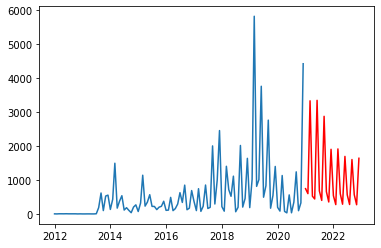

In [68]:
pyplot.plot(dd['sales'])
pyplot.plot(output,color='red')

In [69]:
from pandas.tseries.offsets import DateOffset

In [70]:
future_dates=[dd.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [71]:
future_dates_dd = pd.DataFrame(index=future_dates[1:],columns=dd.columns)

In [72]:
future_dates_dd.tail()

,sales,forecast
2022-07-01,NaN,NaN
2022-08-01,NaN,NaN
2022-09-01,NaN,NaN
2022-10-01,NaN,NaN
2022-11-01,NaN,NaN


In [73]:
future_dd=pd.concat([dd,future_dates_dd])

In [94]:
future_dd['forecast']=results.predict(start=108,end=131,dynamic=True)

<AxesSubplot:>

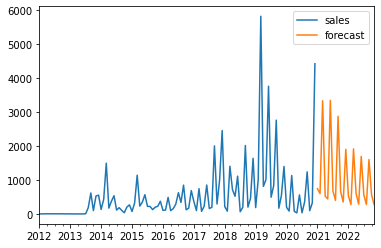

In [95]:
future_dd[['sales','forecast']].plot()